In [77]:
def IntialiseEnv():
    nb_dir = os.path.split(os.getcwd())[0]
    if nb_dir not in sys.path:
        sys.path.append(nb_dir)

    invalid_path='/opt/ros/kinetic/lib/python2.7/dist-packages'
    if invalid_path in sys.path:
        sys.path.remove(invalid_path)

In [78]:
## Import libraries need to be imported, Dont forget to update requirements.txt!
import os
import sys
IntialiseEnv()
import numpy as np
import cv2
import matplotlib.pyplot as plt
import import_ipynb
from Data_Preparation.Data_Preparation import *

In [79]:
def blur(img):
    blur =  cv2.medianBlur(img,5)
    return blur

def sharpen(img):
    kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    im = cv2.filter2D(img, -1, kernel)
    plt.imshow(im)
    return im

def excessive(path):
    kernel = np.array([[1,1,1], [1,-7,1], [1,1,1]])
    im = cv2.filter2D(img, -1, kernel)
    plt.imshow(im)
    return im

def edge_enhance(path):
    kernel = np.array([[-1,-1,-1,-1,-1],
                               [-1,2,2,2,-1],
                               [-1,2,8,2,-1],
                               [-2,2,2,2,-1],
                               [-1,-1,-1,-1,-1]])/8.0
    im = cv2.filter2D(img, -1, kernel)
    plt.imshow(im)
    return im

def addWeightedImg(img,blur):
    result = cv2.addWeighted(img, 1, blur, -0.5, 0)
    plt.imshow(result)
    return result

In [106]:
def Segmentation(img):
#     gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

    edged=cv2.Canny(img,60,150)

    contours, hierarchy=cv2.findContours(edged,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
    cv2.drawContours(img,contours,-1,(0,255,0),1)
    ret =70
    img[img>ret]=255
    img[img<=ret]=0
    img =cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    plt.imshow(img)

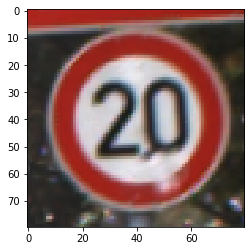

In [110]:
img=loadSampleImg('../DataSet/Training_DataSet/Final_Training/Images/00000/00000_00024.ppm')

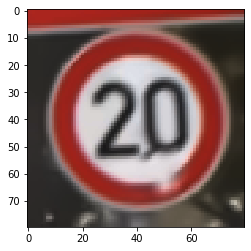

In [111]:
dst = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)
plt.imshow(dst)

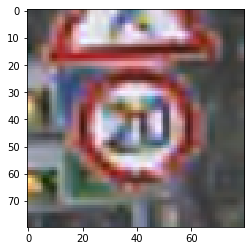

In [71]:
img=edge_enhance(dst)
# img =sharpen(dst)

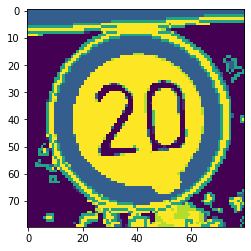

In [112]:
Segmentation(img)